# Predição de Churn

Churn rate é o termo em inglês referente à taxa de clientes de uma empresa que opta por cancelar o serviço contratado. Entender o funcionamento do churn de uma empresa é funmental para o seu funcionamento, sendo cricial para projeções de receitas, estimação do LTV, entre outras métricas.

O presente projeto busca realizar um modelo de predição para identificar os clientes com maiores probabilidades de churn. Com isso, a empresa pode tomar ações focalizadas com o intuito de reverter a situação ou se preparar para ele.

A base de dados utilizada foi relativa a uma empresa financeira.

In [1]:
#Importando bibliotecas relevantes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Importando base de dados

df = pd.read_csv('Churn_Modelling.csv')

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6407,6408,15657829,Fanucci,806,Germany,Male,30,8,168078.83,1,1,0,85028.36,1
4036,4037,15640034,Milligan,551,France,Male,42,2,139561.46,1,1,0,43435.43,1
4219,4220,15813504,Onyemachukwu,543,Germany,Female,25,1,146566.01,1,0,1,161407.48,0
3795,3796,15581102,Baresi,554,France,Female,22,8,0.00,2,0,1,142670.61,0
5569,5570,15701524,Ting,709,France,Male,36,0,0.00,2,1,0,46811.77,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

A base de dados é composta por 10.000 linhas e 14 colunas. As colunas são:

- RowNumber: referência ao número da coluna
- CustomerId: valores de identificação únicos
- Surname: sobrenome do cliente
- CreditScore: score de crédito do cliente
- Geography: país de origem do cliente 
- Gender: gênero do cliente
- Age: idade do cliente, em anos
- Tenure: o tempo, medido em anos, que o cliente mantem o contrato com a empresa
- Balance: o saldo em conta do cliente
- NumOfProducts: o número de produtos contratados pelo cliente
- HasCrCard: se o cliente possui cartão de crédito (binário)
- IsActiveMember: se o cliente é ativo (binário)
- EstimatedSalary: salário estimado do cliente
- Exited: se o cliente é um churn ou não (binário)

De primeira vista, já podemo observar que o número de colunas e os id's, são valores únicos, e portanto podem ser descartadas pois não tem informações relevantes para a nossa análise.

O sobrenome também pode ser descartado, por ter uma grande variedade de valores.

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Por se tratar de uma base de dados pronta, é de se imaginar que ela seja pré tratada e não tenha valores nulos, porém, é importante conferir para não ter problemas com o nosso modelo.

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Para trabalhar com as variáveis categóricas, é necessário transformá-las em variáveis dummies.

In [8]:
data = pd.get_dummies(df, ['Geography', 'Gender'])

data.drop('Gender_Female', axis=1, inplace=True)

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


Text(0.5, 1.0, 'Churn Rate')

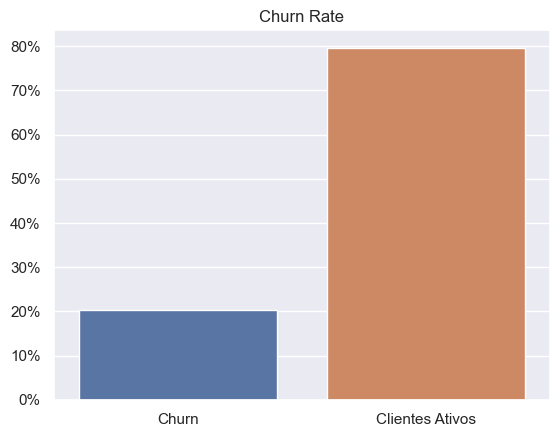

In [25]:
import matplotlib.ticker as mtick


ax = sns.barplot(y = [data['Exited'].mean()*100, (1-data['Exited'].mean())*100], x = ['Churn','Clientes Ativos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Churn Rate")

In [26]:
print("% de churn para homens:", data[data['Gender_Male']==1]['Exited'].mean())

print("% de churn para mulheres:", data[data['Gender_Male']==0]['Exited'].mean())

print("----------------")

print("% de churn para alamães:", data[data['Geography_Germany']==1]['Exited'].mean())

print("% de churn para espanhóis:", data[data['Geography_Spain']==1]['Exited'].mean())

print("% de churn para franceses:", data[data['Geography_France']==1]['Exited'].mean())

print("----------------")

print("% de churn para membros ativos:", data[data['IsActiveMember']==1]['Exited'].mean())

print("% de churn para membros inativos:", data[data['IsActiveMember']==0]['Exited'].mean())

print("----------------")

print("% de churn para membros que usam CC:", data[data['HasCrCard']==1]['Exited'].mean())

print("% de churn para membros  que não usam CC:", data[data['HasCrCard']==0]['Exited'].mean())

% de churn para homens: 0.16455928165658787
% de churn para mulheres: 0.2507153863086066
----------------
% de churn para alamães: 0.32443204463929853
% de churn para espanhóis: 0.1667339523617279
% de churn para franceses: 0.16154766653370561
----------------
% de churn para membros ativos: 0.14269073966220153
% de churn para membros inativos: 0.26850897092183956
----------------
% de churn para membros que usam CC: 0.20184266477675408
% de churn para membros  que não usam CC: 0.20814940577249574


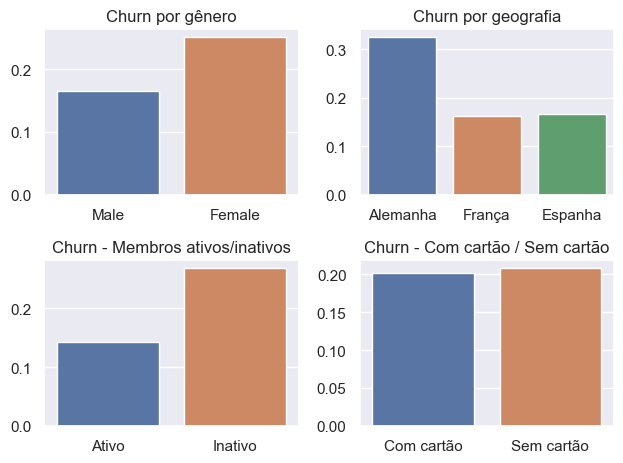

In [27]:
f, axes = plt.subplots(2,2)

sns.barplot(x = ["Male","Female"], y=[data[data['Gender_Male']==1]['Exited'].mean(),
            data[data['Gender_Male']==0]['Exited'].mean()], ax=axes[0,0])

axes[0,0].set_title("Churn por gênero")

sns.barplot(x = ["Alemanha","França", 'Espanha'], y=[data[data['Geography_Germany']==1]['Exited'].mean(),
            data[data['Geography_France']==1]['Exited'].mean(),
            data[data['Geography_Spain']==1]['Exited'].mean()], ax=axes[0,1])

axes[0,1].set_title("Churn por geografia")


sns.barplot(x = ["Ativo","Inativo"], y=[data[data['IsActiveMember']==1]['Exited'].mean(),
            data[data['IsActiveMember']==0]['Exited'].mean()], ax=axes[1,0])

axes[1,0].set_title("Churn - Membros ativos/inativos")

sns.barplot(x = ["Com cartão","Sem cartão"], y=[data[data['HasCrCard']==1]['Exited'].mean(),
            data[data['HasCrCard']==0]['Exited'].mean()], ax=axes[1,1])

axes[1,1].set_title("Churn - Com cartão / Sem cartão")

plt.tight_layout()

In [28]:
data.drop('HasCrCard', axis=1, inplace=True)

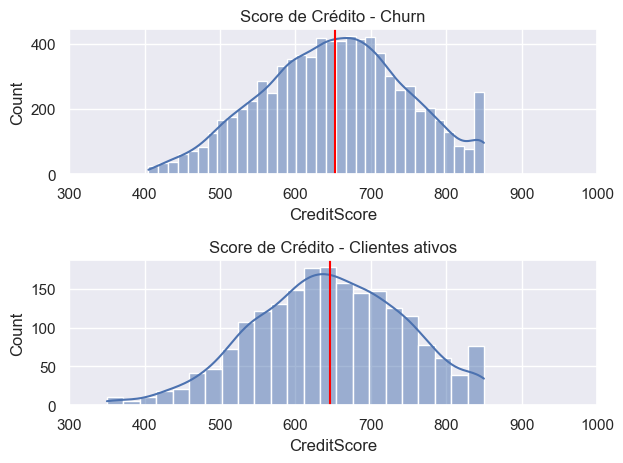

In [29]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="darkgrid")

sns.histplot(data[data['Exited']==0]['CreditScore'], kde=True, ax=ax[0])
ax[0].axvline(data[data['Exited']==0]['CreditScore'].mean(), color='red')

sns.histplot(data[data['Exited']==1]['CreditScore'], kde=True,ax=ax[1])
ax[1].axvline(data[data['Exited']==1]['CreditScore'].mean(), color='red')

ax[0].set_xlim(left=300, right=1000)
ax[1].set_xlim(left=300, right=1000)

ax[0].set_title("Score de Crédito - Churn")
ax[1].set_title("Score de Crédito - Clientes ativos")

plt.tight_layout()

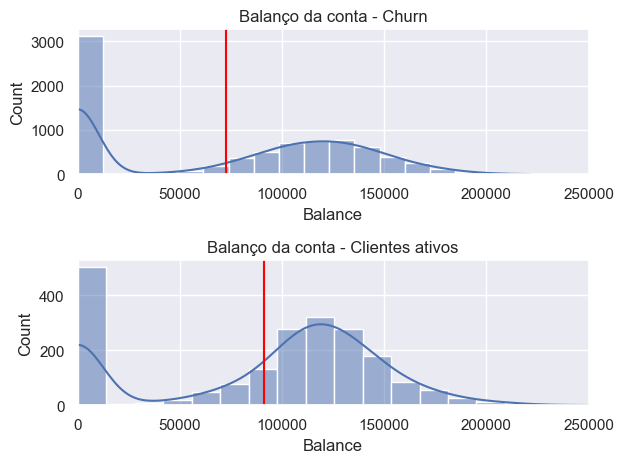

In [30]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="darkgrid")

sns.histplot(data[data['Exited']==0]['Balance'], kde=True, ax=ax[0])
ax[0].axvline(data[data['Exited']==0]['Balance'].mean(), color='red')

sns.histplot(data[data['Exited']==1]['Balance'], kde=True,ax=ax[1])
ax[1].axvline(data[data['Exited']==1]['Balance'].mean(), color='red')

ax[0].set_xlim(left=0, right=250000)
ax[1].set_xlim(left=0, right=250000)

ax[0].set_title("Balanço da conta - Churn")
ax[1].set_title("Balanço da conta - Clientes ativos")

plt.tight_layout()

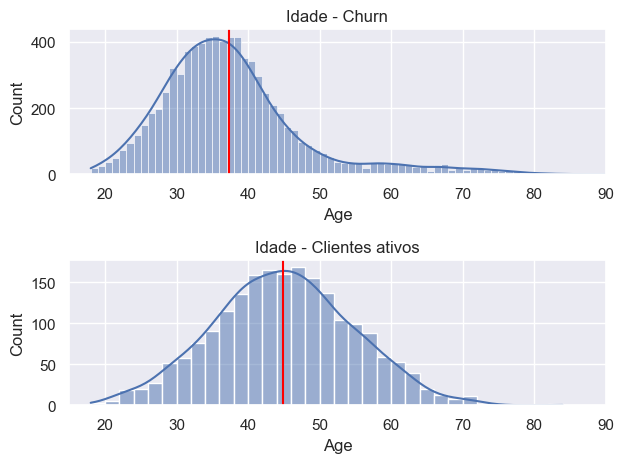

In [31]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="darkgrid")

sns.histplot(data[data['Exited']==0]['Age'], kde=True, ax=ax[0])
ax[0].axvline(data[data['Exited']==0]['Age'].mean(), color='red')

sns.histplot(data[data['Exited']==1]['Age'], kde=True,ax=ax[1])
ax[1].axvline(data[data['Exited']==1]['Age'].mean(), color='red')

ax[0].set_xlim(left=15, right=90)
ax[1].set_xlim(left=15, right=90)

ax[0].set_title("Idade - Churn")
ax[1].set_title("Idade - Clientes ativos")

plt.tight_layout()

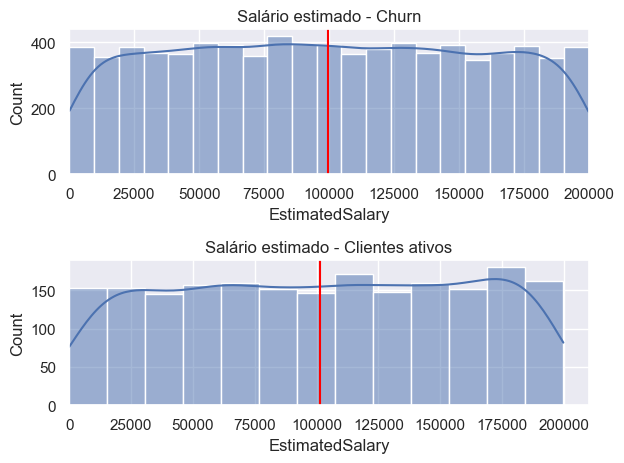

In [32]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="darkgrid")

sns.histplot(data[data['Exited']==0]['EstimatedSalary'], kde=True, ax=ax[0])
ax[0].axvline(data[data['Exited']==0]['EstimatedSalary'].mean(), color='red')

sns.histplot(data[data['Exited']==1]['EstimatedSalary'], kde=True,ax=ax[1])
ax[1].axvline(data[data['Exited']==1]['EstimatedSalary'].mean(), color='red')

ax[0].set_xlim(left=0, right=200000)
ax[1].set_xlim(left=0, right=210000)

ax[0].set_title("Salário estimado - Churn")
ax[1].set_title("Salário estimado - Clientes ativos")

plt.tight_layout()

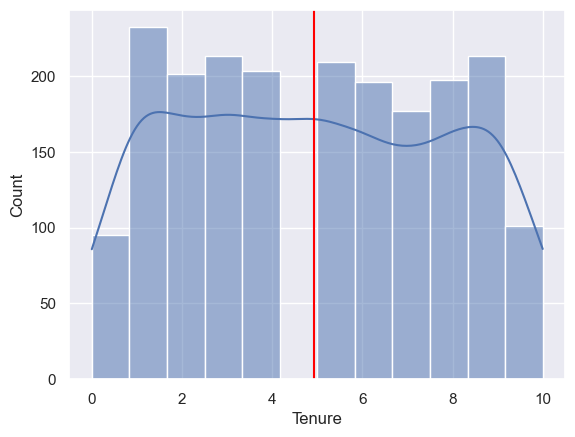

In [33]:
sns.histplot(data[data['Exited']==1], x='Tenure', kde=True)
plt.axvline(data[data['Exited']==1]['Tenure'].mean(), color='red')

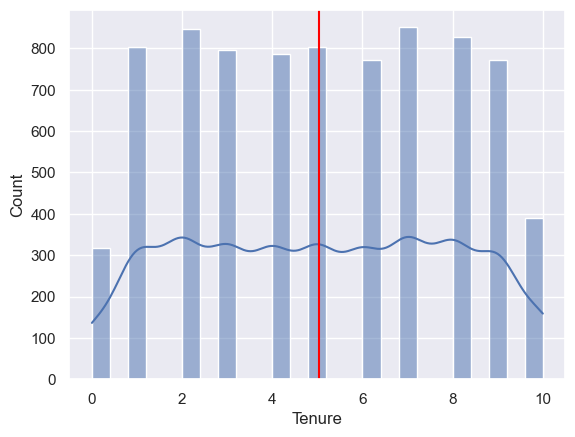

In [34]:
sns.histplot(data[data['Exited']==0], x='Tenure', kde=True)
plt.axvline(data[data['Exited']==0]['Tenure'].mean(), color='red')

## Balanceamento

Um problema comum para bases de dados envolvendo churn é o desbalanceamento da variável dependente. Por ser um evento que o ocorre em menor quantidade, é natural que tenhamos menos casos onde um churn ocorrou na nossa base de dados

Text(0.5, 1.0, 'Número de Observações')

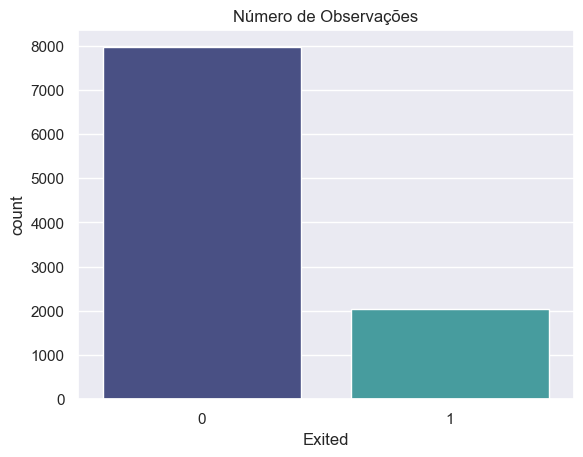

In [35]:
sns.countplot(data, x = 'Exited', palette='mako')
plt.title("Número de Observações")


No caso em questão, temos aproximadamente 8000 casos onde o churn não ocorreu e 2000 onde ocorreu. Sendo assim, é necessário realizar um balanceamento.

Optei por realizar um over-sampling.

In [36]:
sample = data[data['Exited']==1].sample(6000, replace = True)

balanced_df = data.append(sample)

C:\Users\mathe\AppData\Local\Temp\ipykernel_61532\797899110.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = data.append(sample)


Text(0.5, 1.0, 'Número de Observações')

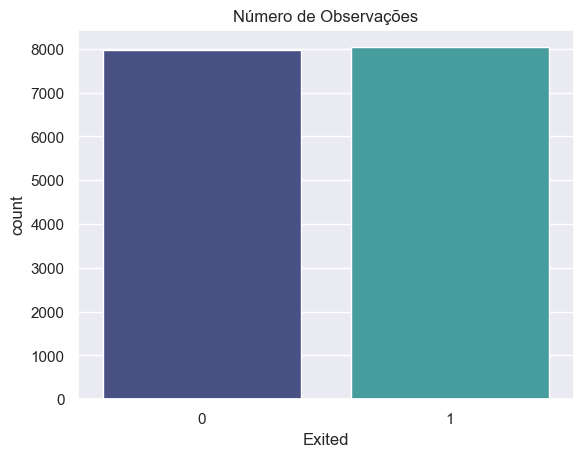

In [37]:
sns.countplot(balanced_df, x = 'Exited', palette='mako')
plt.title("Número de Observações")

## Regressão Logistica


In [38]:
d1 = balanced_df.drop('Exited', axis=1)
y = balanced_df['Exited']
scale = StandardScaler().fit_transform(d1.values)
scale.shape

(16000, 11)

In [51]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [39]:
X = pd.DataFrame(scale, columns=d1.columns, index=d1.index)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,-0.306807,0.075416,-1.021893,-1.329666,-0.761303,1.087297,0.015457,1.082928,-0.662261,-0.554054,-1.017401
1,-0.418767,-0.018736,-1.364853,0.034512,-0.761303,1.087297,0.208972,-0.923423,-0.662261,1.804878,-1.017401
2,-1.497661,0.075416,1.035868,1.269204,2.196291,-0.919712,0.232985,1.082928,-0.662261,-0.554054,-1.017401
3,0.507453,-0.207040,-1.364853,-1.329666,0.717494,-0.919712,-0.114587,1.082928,-0.662261,-0.554054,-1.017401
4,2.044367,0.169567,-1.021893,0.713329,-0.761303,1.087297,-0.369454,-0.923423,-0.662261,1.804878,-1.017401


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [53]:
params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg=LogisticRegression()
logreg=GridSearchCV(logreg,params,cv=10, scoring='recall')
logreg.fit(X_train,y_train)

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [47]:
logreg_cv.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [54]:
logReg = LogisticRegression(solver='saga').fit(X_train,y_train)

In [56]:
predictedlog = logreg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(predictedlog, y_test))
print("Recall:",metrics.recall_score(predictedlog, y_test))
print("Precision:",metrics.precision_score(predictedlog, y_test))

Accuracy: 0.70875
Recall: 0.7004561581348201
Precision: 0.7065439672801636


In [49]:
print('Test Dataset Score:', logreg.score(X_test, y_test))

print('Train Dataset Score:', logreg.score(X_train, y_train))

Test Dataset Score: 0.70875
Train Dataset Score: 0.7091666666666666


In [27]:
print("Accuracy score:", metrics.accuracy_score(y_test, predicted))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, predicted))
print("Class report:\n", metrics.classification_report(y_test, predicted))

Accuracy score: 0.715
Confusion Matrix: 
 [[1455  589]
 [ 551 1405]]
Class report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      2044
           1       0.70      0.72      0.71      1956

    accuracy                           0.71      4000
   macro avg       0.71      0.72      0.71      4000
weighted avg       0.72      0.71      0.72      4000



## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
params = {'n_neighbors': range(31)}

In [59]:
clf = GridSearchCV(KNeighborsClassifier(), param_grid= params, scoring="recall")
clf.fit(X_train, y_train)

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 155.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packa

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(0, 31)}, scoring='recall')

In [60]:
gridpred = clf.predict(X_test)

print("KNN \n")
print('Accuracy:', metrics.accuracy_score(gridpred, y_test))
print("Recall:",metrics.recall_score(gridpred, y_test))
print("Precision:",metrics.precision_score(gridpred, y_test))

print("---------------------------- \n LogReg \n")
print('Accuracy:', metrics.accuracy_score(predictedlog, y_test))
print("Recall:",metrics.recall_score(predictedlog, y_test))
print("Precision:",metrics.precision_score(predictedlog, y_test))

KNN 

Accuracy: 0.914
Recall: 0.8614349775784753
Precision: 0.9821063394683026
---------------------------- 
 LogReg 

Accuracy: 0.70875
Recall: 0.7004561581348201
Precision: 0.7065439672801636
